In [1]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 4b, práctico 4

In [2]:
def fem1d(f,x):
    n = len(x) - 2
    h = 1/n


    #Funciones fi ya multiplicadas por f(x), válidas en [0,1]
    def fi_f(x, x_ant, xi, x_post):
        if x_ant <= x <= xi:
            return (x-x_ant)/h * f(x)
        elif xi <= x <= x_post:
            return (x_post - x)/h * f(x)
        else:
            return 0


    A = (2*np.eye(n) - np.diag(np.ones(n-1), 1) - np.diag(np.ones(n-1), -1))/h

    vector = [0] * n
    for i in range(0, n):
        xi = x[i+1]
        x_ant = x[i]
        x_post = x[i+2]
        vector[i] = integrate.quad(fi_f, 0, 1, args=(x_ant, xi, x_post))[0]


    res = np.linalg.solve(A,vector)

    return res

In [3]:
x4i = [0, 0.1, 0.3, 0.333, 0.5, 0.75, 1]
x4ii = [i* 1/10 for i in range(11)]


def fun4b(x):
    return x**3

def exacta4b(x):
    return -1/20 * x**5 + 1/20 * x

In [4]:
res_4bi = fem1d(fun4b, x4i)
res_4bii = fem1d(fun4b, x4ii)

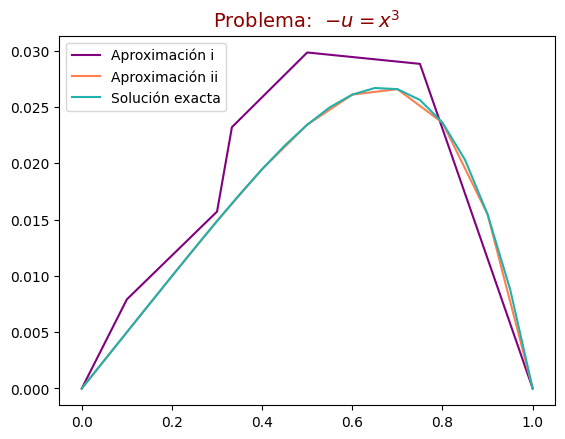

In [5]:
u_4bi = [0]
u_4bi.extend(res_4bi)
u_4bi.append(0)

u_4bii = [0]
u_4bii.extend(res_4bii)
u_4bii.append(0)

exacta4bi = [exacta4b(i*1/20) for i in range(21)]

plt.plot(x4i, u_4bi, label = 'Aproximación i', color = 'purple')
plt.plot(x4ii, u_4bii, label = 'Aproximación ii', color = 'coral')
plt.plot(np.linspace(0,1,21), exacta4bi, label = 'Solución exacta', color = 'lightseagreen')
plt.title(r'Problema:  $-u^{''} = x^{3}$', color = 'darkred', fontsize = 14)
plt.legend()
plt.show()